In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the data set
df = pd.read_csv('data/tips.csv')

# check the data of first 5 rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# check the info of this data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
# View statistics information
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# Calculate the average tip amount:
averange_tip = df['tip'].mean()
print(f'averange tip amount: {averange_tip:.2f}')

averange tip amount: 3.00


In [6]:
# Average tips by gender:
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

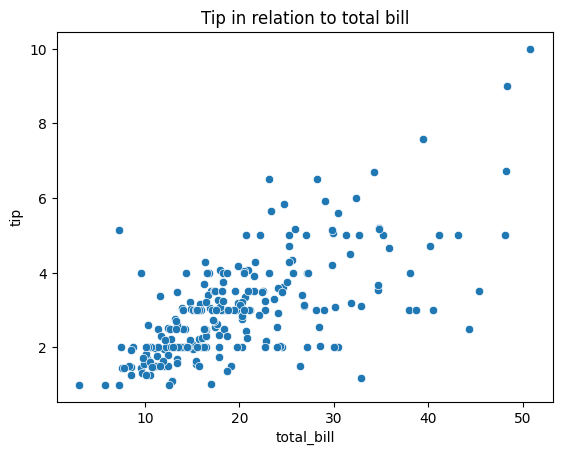

In [7]:
# Plot the tip versus the total bill:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Tip in relation to total bill')
plt.show()

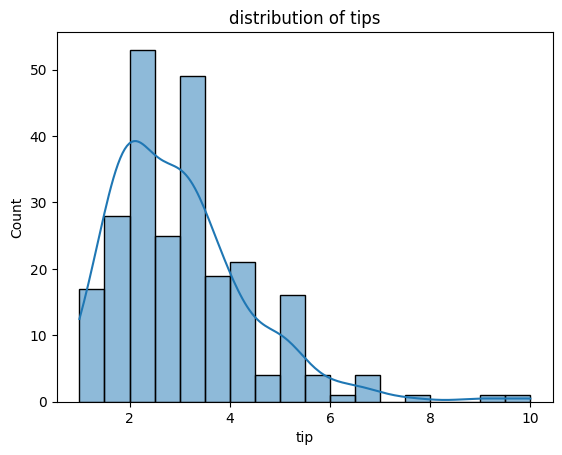

In [8]:
# Map the distribution of tips
sns.histplot(df['tip'], kde=True)
plt.title('distribution of tips')
plt.show()

In [9]:
# group by sex, count the averange tips

avg_tip_by_sex = df.groupby('sex')['tip'].mean()
print(avg_tip_by_sex)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [10]:
# caculate tip percentage
df['tip_percentage'] = (df['tip']/df['total_bill'])*100

# group by sex, get the tip percentage
avg_tip_percentage_by_sex = df.groupby('sex')['tip_percentage'].mean()
print(avg_tip_percentage_by_sex)

sex
Female    16.649074
Male      15.765055
Name: tip_percentage, dtype: float64


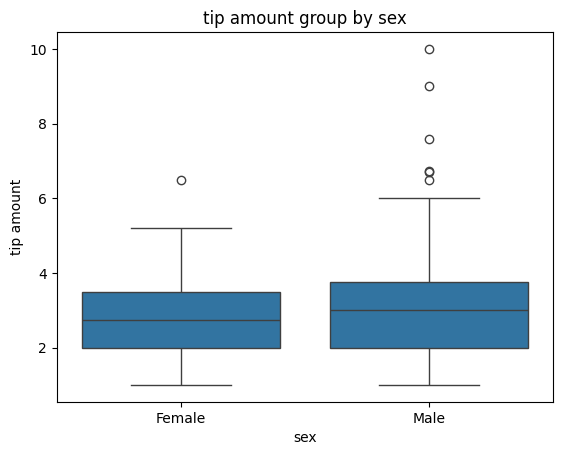

In [11]:
# Draw box plot of tip amounts, group by sex

sns.boxplot(x='sex', y='tip', data=df)
plt.title('tip amount group by sex')
plt.xlabel('sex')
plt.ylabel('tip amount')
plt.show()

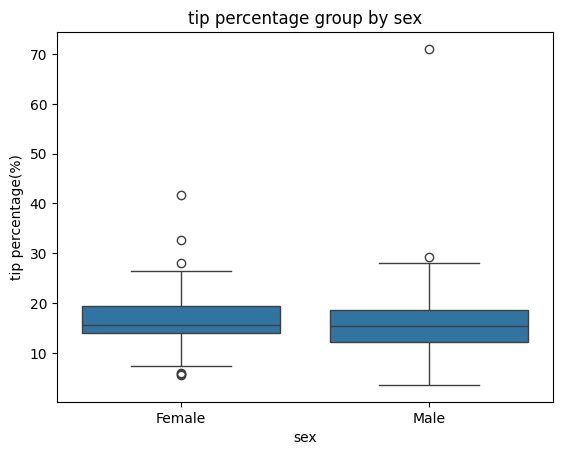

In [12]:
# Draw box plot of tip ratio
sns.boxplot(x='sex', y='tip_percentage', data=df)
plt.title('tip percentage group by sex')
plt.xlabel('sex')
plt.ylabel('tip percentage(%)')
plt.show()

In [13]:
from scipy import stats

# Extract tip amounts for men and women
male_tips = df[df['sex'] == 'Male']['tip']
female_tips = df[df['sex'] == 'Female']['tip']

# Perform an independent samples t test
t_stat, p_value = stats.ttest_ind(male_tips, female_tips)
print(f"T统计量: {t_stat}, P值: {p_value}")

T统计量: 1.387859705421269, P值: 0.16645623503456755


In [14]:
# Calculate Average Tip Amount by Smoker Status
# Group by smoker status and calculate the average tip amount
avg_tip_by_smoker = df.groupby('smoker')['tip'].mean()
print(avg_tip_by_smoker)

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


In [15]:
# Calculate Average Tip Percentage by Smoker Status
# Group by smoker status and calculate the average tip percentage
avg_tip_percentage_by_smoker = df.groupby('smoker')['tip_percentage'].mean()
print(avg_tip_percentage_by_smoker)


smoker
No     15.932846
Yes    16.319604
Name: tip_percentage, dtype: float64


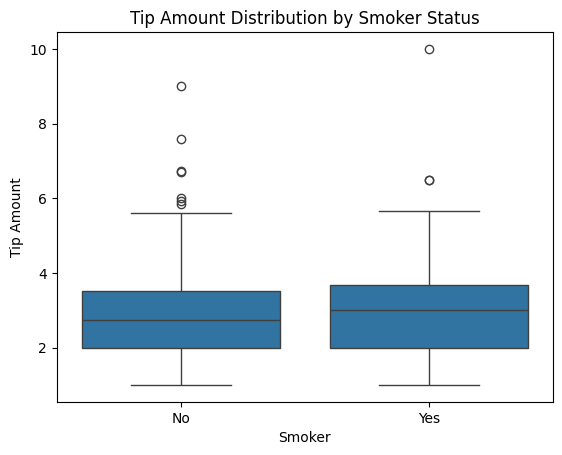

In [16]:
# Visualize Tip Amount Distribution by Smoker Status
# Create a boxplot to visualize tip amount distribution by smoker status
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Tip Amount Distribution by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Tip Amount')
plt.show()

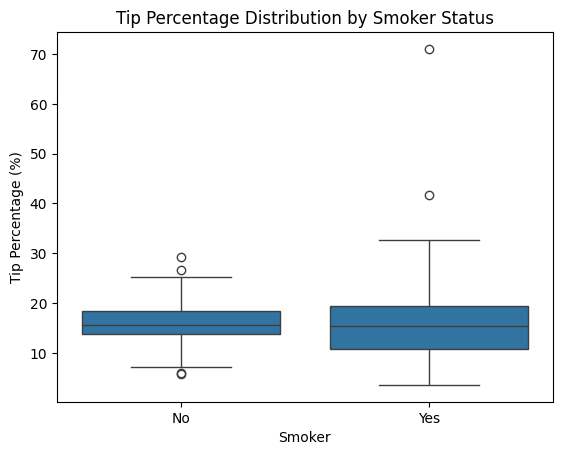

In [17]:
# Visualize Tip Percentage Distribution by Smoker Status
# Create a boxplot to visualize tip percentage distribution by smoker status
sns.boxplot(x='smoker', y='tip_percentage', data=df)
plt.title('Tip Percentage Distribution by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Tip Percentage (%)')
plt.show()

In [18]:
# Statistical Test 
from scipy import stats

# Extract tip amounts for males and females
male_tips = df[df['sex'] == 'Male']['tip']
female_tips = df[df['sex'] == 'Female']['tip']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(male_tips, female_tips)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.387859705421269, P-value: 0.16645623503456755


In [19]:
# Group by day and calculate the average tip amount
avg_tip_by_day = df.groupby('day')['tip'].mean()
print(avg_tip_by_day)

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [20]:
# Group by day and calculate the average tip percentage
avg_tip_percentage_by_day = df.groupby('day')['tip_percentage'].mean()
print(avg_tip_percentage_by_day)

day
Fri     16.991303
Sat     15.315172
Sun     16.689729
Thur    16.127563
Name: tip_percentage, dtype: float64


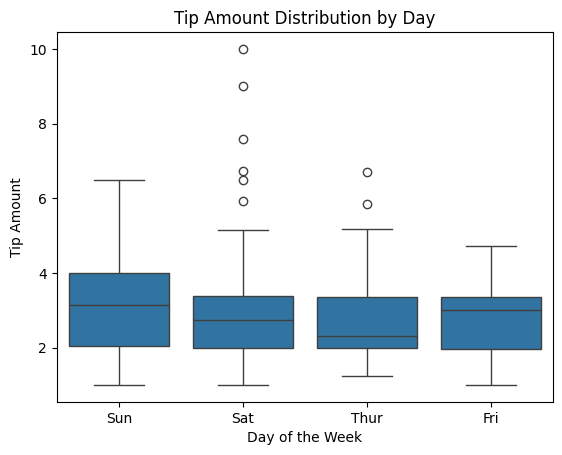

In [21]:
# Create a boxplot to visualize tip amount distribution by day
sns.boxplot(x='day', y='tip', data=df)
plt.title('Tip Amount Distribution by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.show()

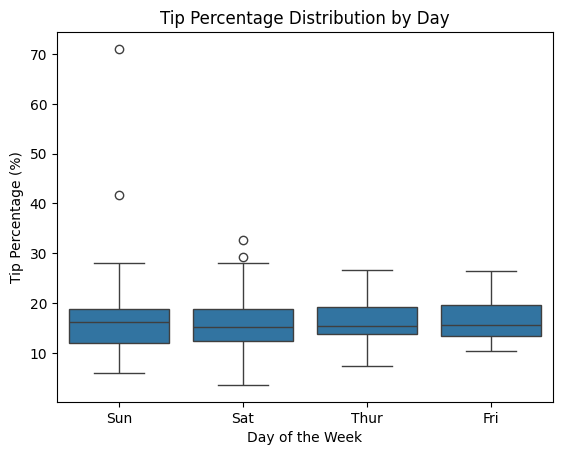

In [22]:
# Create a boxplot to visualize tip percentage distribution by day
sns.boxplot(x='day', y='tip_percentage', data=df)
plt.title('Tip Percentage Distribution by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Percentage (%)')
plt.show()

In [23]:
from scipy import stats

# Extract tip amounts for each day
thu_tips = df[df['day'] == 'Thur']['tip']
fri_tips = df[df['day'] == 'Fri']['tip']
sat_tips = df[df['day'] == 'Sat']['tip']
sun_tips = df[df['day'] == 'Sun']['tip']

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(thu_tips, fri_tips, sat_tips, sun_tips)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.6723551980998699, P-value: 0.17358855530405373


In [24]:
# Group by time and calculate the average tip amount
avg_tip_by_time = df.groupby('time')['tip'].mean()
print(avg_tip_by_time)

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64


In [25]:
# Group by time and calculate the average tip percentage
avg_tip_percentage_by_time = df.groupby('time')['tip_percentage'].mean()
print(avg_tip_percentage_by_time)

time
Dinner    15.951779
Lunch     16.412793
Name: tip_percentage, dtype: float64


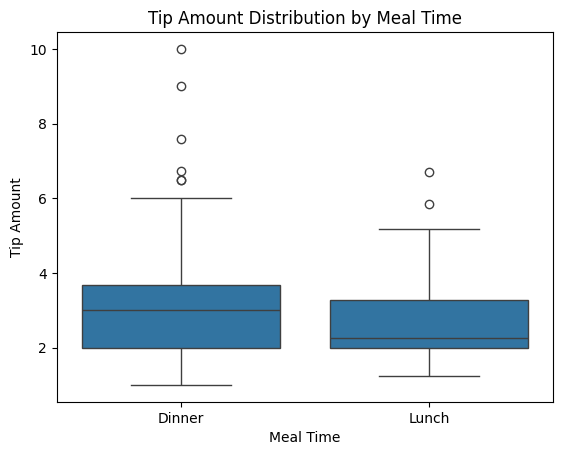

In [26]:
# Create a boxplot to visualize tip amount distribution by time
sns.boxplot(x='time', y='tip', data=df)
plt.title('Tip Amount Distribution by Meal Time')
plt.xlabel('Meal Time')
plt.ylabel('Tip Amount')
plt.show()

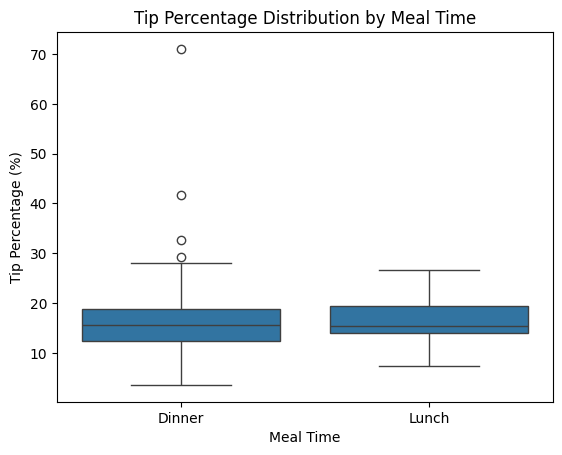

In [27]:
# Create a boxplot to visualize tip percentage distribution by time
sns.boxplot(x='time', y='tip_percentage', data=df)
plt.title('Tip Percentage Distribution by Meal Time')
plt.xlabel('Meal Time')
plt.ylabel('Tip Percentage (%)')
plt.show()

In [28]:
# Extract tip amounts for lunch and dinner
lunch_tips = df[df['time'] == 'Lunch']['tip']
dinner_tips = df[df['time'] == 'Dinner']['tip']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(lunch_tips, dinner_tips)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.9062569301202392, P-value: 0.05780153475171558


In [29]:
# Group by size and calculate the average tip amount
avg_tip_by_size = df.groupby('size')['tip'].mean()
print(avg_tip_by_size)

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


In [30]:
# Group by size and calculate the average tip percentage
avg_tip_percentage_by_size = df.groupby('size')['tip_percentage'].mean()
print(avg_tip_percentage_by_size)

size
1    21.729202
2    16.571919
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: tip_percentage, dtype: float64


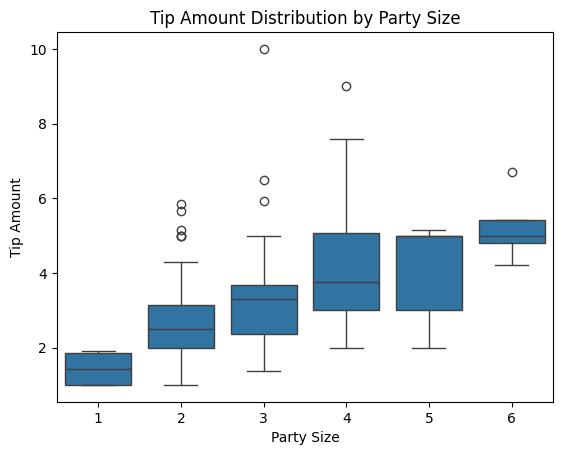

In [31]:
# Create a boxplot to visualize tip amount distribution by size
sns.boxplot(x='size', y='tip', data=df)
plt.title('Tip Amount Distribution by Party Size')
plt.xlabel('Party Size')
plt.ylabel('Tip Amount')
plt.show()

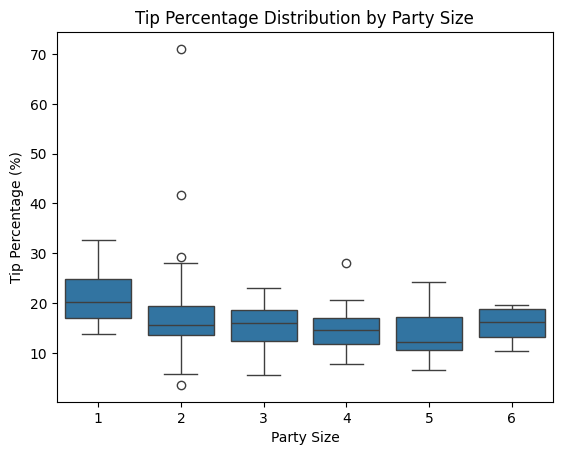

In [32]:
# Create a boxplot to visualize tip percentage distribution by size
sns.boxplot(x='size', y='tip_percentage', data=df)
plt.title('Tip Percentage Distribution by Party Size')
plt.xlabel('Party Size')
plt.ylabel('Tip Percentage (%)')
plt.show()

In [33]:
# Calculate correlation between size and tip amount
corr_tip_amount = df['size'].corr(df['tip'])
print(f"Correlation between party size and tip amount: {corr_tip_amount}")

# Calculate correlation between size and tip percentage
corr_tip_percentage = df['size'].corr(df['tip_percentage'])
print(f"Correlation between party size and tip percentage: {corr_tip_percentage}")

Correlation between party size and tip amount: 0.48929877523035775
Correlation between party size and tip percentage: -0.14285960069312378


In [34]:
# Calculate correlation between total bill and tip amount
corr_total_bill_tip = df['total_bill'].corr(df['tip'])
print(f"Correlation between total bill and tip amount: {corr_total_bill_tip}")


Correlation between total bill and tip amount: 0.6757341092113641


In [35]:
# Calculate correlation between size and tip amount
corr_size_tip = df['size'].corr(df['tip'])
print(f"Correlation between party size and tip amount: {corr_size_tip}")

# Calculate correlation between tip percentage and tip amount
corr_tip_percentage_tip = df['tip_percentage'].corr(df['tip'])
print(f"Correlation between tip percentage and tip amount: {corr_tip_percentage_tip}")

Correlation between party size and tip amount: 0.48929877523035775
Correlation between tip percentage and tip amount: 0.3423696229502659


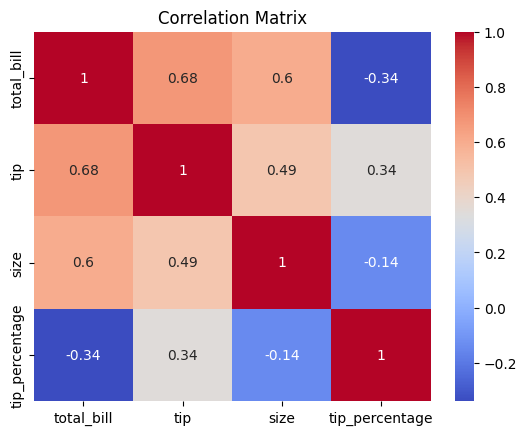

In [36]:
# Calculate correlation matrix
correlation_matrix = df[['total_bill', 'tip', 'size', 'tip_percentage']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
import statsmodels.api as sm

# Define independent variables (total_bill, size) and dependent variable (tip)
X = df[['total_bill', 'size']]
y = df['tip']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           9.67e-34
Time:                        11:46:40   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

In [38]:
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Display the first few rows of the transformed dataset
print(df_dummies.head())

   total_bill   tip  size  tip_percentage  ...  day_Sat  day_Sun  day_Thur  time_Lunch
0       16.99  1.01     2        5.944673  ...    False     True     False       False
1       10.34  1.66     3       16.054159  ...    False     True     False       False
2       21.01  3.50     3       16.658734  ...    False     True     False       False
3       23.68  3.31     2       13.978041  ...    False     True     False       False
4       24.59  3.61     4       14.680765  ...    False     True     False       False

[5 rows x 10 columns]


In [39]:
# Define independent variables (X) and dependent variable (y)
X = df_dummies.drop(columns=['tip'])
y = df_dummies['tip']

# Add a constant to the independent variables
X = sm.add_constant(X)

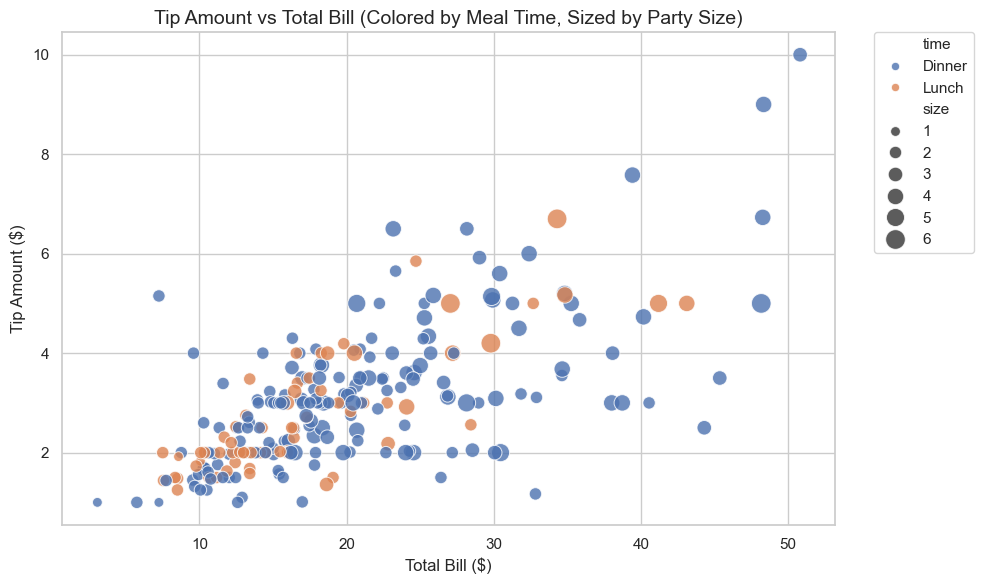

In [43]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='total_bill',  # X-axis: total bill
    y='tip',         # Y-axis: tip amount
    hue='time',      # Color: meal time (Lunch/Dinner)
    size='size',     # Circle size: party size
    sizes=(50, 200), # Range of circle sizes
    alpha=0.8,       # Transparency of circles
    data=df          # Data source
)

# Add title and labels
plt.title('Tip Amount vs Total Bill (Colored by Meal Time, Sized by Party Size)', fontsize=14)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.show()